# Apply a Box-Cox transformation to a Field


The objective of this Use Case is to estimate a Box Cox transformation
from a field which all values are positive (eventually after a shift
to satisfy the positiveness) and to apply it on the field.
The object *BoxCoxFactory* enables to create a factory of
Box Cox transformation.
Then, we estimate the Box Cox transformation
$h_{\underline{\lambda}}$ from the initial field values
$(\underline{x}_0, \dots, \underline{x}_{N-1})$ thanks to the method
*build* of the object *BoxCoxFactory*, which produces an object of
type *BoxCoxTransform*.
If the field values $(\underline{x}_0, \dots, \underline{x}_{N-1})$ have
some negative values, it is possible to translate the values with
respect a given shift $\underline{\alpha}$ which has to be mentioned
either at the creation of the object *BoxCoxFactory* or when using the
method *build*.
Then the Box Cox transformation is the composition of
$h_{\underline{\lambda}}$ and this translation.

The object *BoxCoxTransform* enables to:

-  transform the field values
   $(\underline{x}_{0}, \dots,\underline{x}_{N-1})$ of dimension $d$
   into the values $(\underline{y}_{0}, \dots, \underline{y}_{N-1})$ with
   stabilized variance, such that for each vertex $\underline{t}_i$ we
   have:

   $$\underline{y}_{i} = h_{\underline{\lambda}}(\underline{x}_{i})$$

    or

   $$\underline{y}_{i} = h_{\underline{\lambda}}(\underline{x}_{i} + \underline{\alpha})$$

   thanks to the operand *()*. The field based on the values
   $\underline{y}_{i}$ shares the same mesh than the initial field.

-  create the inverse Box Cox transformation such that :

   $$\underline{x}_{i}= h^{-1}_{\underline{\lambda}}(\underline{y}_{i})$$

    or

   $$\underline{x}_{i} = h^{-1}_{\underline{\lambda}}(\underline{y}_{i}) - \underline{\alpha}$$

   thanks to the method *getInverse()* which produces an object of type
   *InverseBoxCoxTransform* that can be evaluated on a field.
   The new field based shares the same mesh than the initial field.


In [1]:
from __future__ import print_function
import openturns as ot

In [2]:
# Define a process
myIndices= ot.Indices([10,5])
myMesher =ot.IntervalMesher(myIndices)
myInterval = ot.Interval([0.0, 0.0], [2.0, 1.0])
myMesh = myMesher.build(myInterval)
amplitude = [1.0]
scale = [0.2, 0.2]
myCovModel = ot.ExponentialModel(scale, amplitude)
myXproc = ot.GaussianProcess(myCovModel, myMesh)
g = ot.SymbolicFunction(['x1'],  ['exp(x1)'])
myDynTransform = ot.ValueFunction(g, myMesh)
myXtProcess = ot.CompositeProcess(myDynTransform, myXproc)

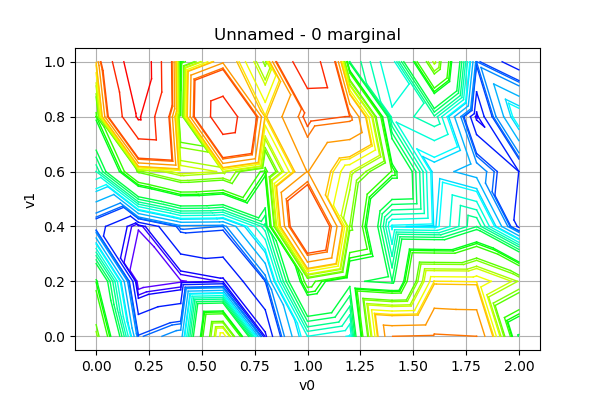

In [3]:
# Draw a field
field = myXtProcess.getRealization()
field.drawMarginal(0)

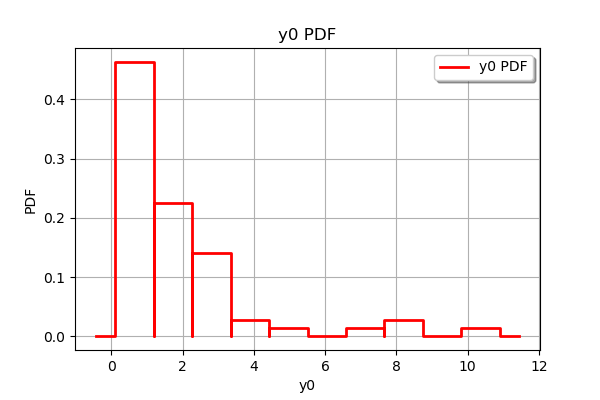

In [4]:
# Draw values
marginal = ot.HistogramFactory().build(field.getValues())
marginal.drawPDF()

In [5]:
# Build the transformed field through Box-Cox
myModelTransform = ot.BoxCoxFactory().build(field)
myStabilizedField = myModelTransform(field)

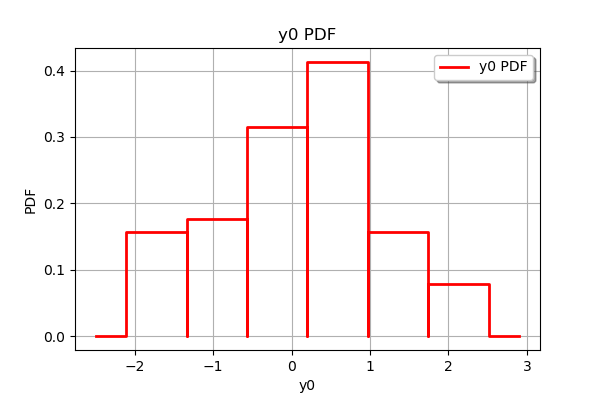

In [6]:
# Draw values
marginal = ot.HistogramFactory().build(myStabilizedField.getValues())
marginal.drawPDF()